<a href="https://colab.research.google.com/github/Kwon-mijeong/Data-programming/blob/main/Project_Victims_of_Crime_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle data download**

사용하는 Dataset : https://www.kaggle.com/kirticism/victims-of-crime
-	Data1 : By ethnicity and gender-table.csv
-	Data2 : By ethnicity and socio economic group-table.csv

**참조 : https://soohee410.github.io/colab_kaggle**

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mmiijj","key":"821f337873cbdd7ab96c35d2565c5372"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kirticism/victims-of-crime

  0% 0.00/2.38k [00:00<?, ?B/s]
100% 2.38k/2.38k [00:00<00:00, 915kB/s]


In [ ]:
!unzip victims-of-crime.zip
!ls

Archive:  victims-of-crime.zip
  inflating: by ethnicity and age group-table.csv  
  inflating: by ethnicity and gender-table.csv  
  inflating: by ethnicity and socio economic group-table.csv  
  inflating: by ethnicity over time-table.csv  
'by ethnicity and age group-table.csv'		    kaggle.json
'by ethnicity and gender-table.csv'		    sample_data
'by ethnicity and socio economic group-table.csv'   victims-of-crime.zip
'by ethnicity over time-table.csv'


## **Victims of Crime**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('by ethnicity and gender-table.csv')
df

,Unnamed: 0,All,Unnamed: 2,Female,Unnamed: 4,Male,Unnamed: 6
0,Ethnicity,%,Sample size,%,Sample size,%,Sample size
1,Asian,15,"6,156",15,"3,080",15,"3,076"
2,Black,15,"2,855",16,"1,697",14,"1,158"
3,Mixed,20,"1,163",19,649,21,514
4,White,14,"91,345",14,"49,258",14,"42,087"
5,Other,16,862,17,436,15,426


In [ ]:
df2 = pd.read_csv('by ethnicity and socio economic group-table.csv')
df2

,Unnamed: 0,Asian,Unnamed: 2,Black,Unnamed: 4,Mixed,Unnamed: 6,White,Unnamed: 8,Other,Unnamed: 10
0,Socio-economic classification,%,Sample size,%,Sample size,%,Sample size,%,Sample size,%,Sample size
1,Managerial and professional occupations,18,"2,187",17,884,23,421,14,"33,511",17,267
2,Intermediate occupations,17,"1,225",17,447,16,195,13,"21,464",16,141
3,Routine and manual occupations,13,"1,544",15,"1,053",21,360,13,"31,159",14,238
4,Never worked and long-term unemployed,13,652,6,198,25,52,14,"2,335",12,103
5,Full time students,14,453,15,219,15,124,20,"2,077",18,104
6,Not classified,8,95,7,54,?,11,9,799,?,9


# **Victims of Crime Dataset 수정**

**- ethnicity and gender-table -**

1.   불필요한 항목 제거
2.   column name 재정의



In [ ]:
df.columns = ['ethnicity',  '',  'All', '', 'Female', '', 'Male']
df

,ethnicity,,All,,Female,,Male
0,Ethnicity,%,Sample size,%,Sample size,%,Sample size
1,Asian,15,"6,156",15,"3,080",15,"3,076"
2,Black,15,"2,855",16,"1,697",14,"1,158"
3,Mixed,20,"1,163",19,649,21,514
4,White,14,"91,345",14,"49,258",14,"42,087"
5,Other,16,862,17,436,15,426


In [ ]:
df = df.drop(index=[0], axis = 1)
df

,ethnicity,,All,,Female,,Male
1,Asian,15,"6,156",15,"3,080",15,"3,076"
2,Black,15,"2,855",16,"1,697",14,"1,158"
3,Mixed,20,"1,163",19,649,21,514
4,White,14,"91,345",14,"49,258",14,"42,087"
5,Other,16,862,17,436,15,426


In [ ]:
data = df.drop(columns=[''], axis = 0)
data

,ethnicity,All,Female,Male
1,Asian,"6,156","3,080","3,076"
2,Black,"2,855","1,697","1,158"
3,Mixed,"1,163",649,514
4,White,"91,345","49,258","42,087"
5,Other,862,436,426


In [ ]:
data = data.drop(columns=['ethnicity'], axis =0)
data = data.transpose()
data

,1,2,3,4,5
All,"6,156","2,855","1,163","91,345",862
Female,"3,080","1,697",649,"49,258",436
Male,"3,076","1,158",514,"42,087",426


In [ ]:
data.columns = ['Asian', 'Black', 'Mixed', 'White', 'Other']
data

,Asian,Black,Mixed,White,Other
All,"6,156","2,855","1,163","91,345",862
Female,"3,080","1,697",649,"49,258",436
Male,"3,076","1,158",514,"42,087",426


**- ethnicity and socio economic group-table -**

1.   불필요한 항목 제거
2.   column name 재정의

In [ ]:
df2.columns = ['socio economic group', '', 'Asian', '', 'Black', '', 'Mixed', '', 'White', '', 'Other']
df2

,socio economic group,,Asian,,Black,,Mixed,,White,,Other
0,Socio-economic classification,%,Sample size,%,Sample size,%,Sample size,%,Sample size,%,Sample size
1,Managerial and professional occupations,18,"2,187",17,884,23,421,14,"33,511",17,267
2,Intermediate occupations,17,"1,225",17,447,16,195,13,"21,464",16,141
3,Routine and manual occupations,13,"1,544",15,"1,053",21,360,13,"31,159",14,238
4,Never worked and long-term unemployed,13,652,6,198,25,52,14,"2,335",12,103
5,Full time students,14,453,15,219,15,124,20,"2,077",18,104
6,Not classified,8,95,7,54,?,11,9,799,?,9


In [ ]:
df2 = df2.drop(index=[0, 6], axis=1)
df2

,socio economic group,,Asian,,Black,,Mixed,,White,,Other
1,Managerial and professional occupations,18,"2,187",17,884,23,421,14,"33,511",17,267
2,Intermediate occupations,17,"1,225",17,447,16,195,13,"21,464",16,141
3,Routine and manual occupations,13,"1,544",15,"1,053",21,360,13,"31,159",14,238
4,Never worked and long-term unemployed,13,652,6,198,25,52,14,"2,335",12,103
5,Full time students,14,453,15,219,15,124,20,"2,077",18,104


In [ ]:
data2 = df2.drop(columns=[''], axis = 0)
data2

,socio economic group,Asian,Black,Mixed,White,Other
1,Managerial and professional occupations,"2,187",884,421,"33,511",267
2,Intermediate occupations,"1,225",447,195,"21,464",141
3,Routine and manual occupations,"1,544","1,053",360,"31,159",238
4,Never worked and long-term unemployed,652,198,52,"2,335",103
5,Full time students,453,219,124,"2,077",104


# Data type int로 변환


1.   dataframe의 type 확인
2.   '  ,  '를 없애고 숫자 데이터를 int type으로 변환



In [ ]:
data2.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   socio economic group  5 non-null      object
 1   Asian                 5 non-null      object
 2   Black                 5 non-null      object
 3   Mixed                 5 non-null      object
 4   White                 5 non-null      object
 5   Other                 5 non-null      object
dtypes: object(6)
memory usage: 280.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, All to Male
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Asian   3 non-null      object
 1   Black   3 non-null      object
 2   Mixed   3 non-null      object
 3   White   3 non-null      object
 4   Other   3 non-null      object
dtypes: object(5)
memory usage: 144.0+ bytes


In [ ]:
data['Asian'] = data.Asian.str.replace(',', '').astype('int64')
data['Black'] = data.Black.str.replace(',', '').astype('int64')
data['Mixed'] = data.Mixed.str.replace(',', '').astype('int64')
data['White'] = data.White.str.replace(',', '').astype('int64')
data['Other'] = data.Other.str.replace(',', '').astype('int64')
data

,Asian,Black,Mixed,White,Other
All,6156,2855,1163,91345,862
Female,3080,1697,649,49258,436
Male,3076,1158,514,42087,426


In [ ]:
data2['Asian'] = data2.Asian.str.replace(',', '').astype('int64')
data2['Black'] = data2.Black.str.replace(',', '').astype('int64')
data2['Mixed'] = data2.Mixed.str.replace(',', '').astype('int64')
data2['White'] = data2.White.str.replace(',', '').astype('int64')
data2['Other'] = data2.Other.str.replace(',', '').astype('int64')
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,socio economic group,Asian,Black,Mixed,White,Other
1,Managerial and professional occupations,2187,884,421,33511,267
2,Intermediate occupations,1225,447,195,21464,141
3,Routine and manual occupations,1544,1053,360,31159,238
4,Never worked and long-term unemployed,652,198,52,2335,103
5,Full time students,453,219,124,2077,104


# Pie Plot
**참조 : https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py**

**- 범죄 희생자(여성)의 인종별 비중**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


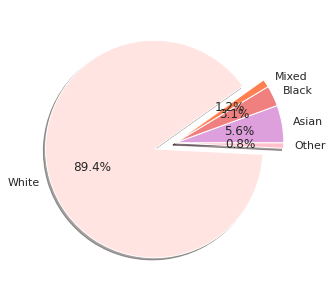

In [ ]:
value = [data.loc[['Female'], ['Asian']], data.loc[['Female'], ['Black']],data.loc[['Female'], ['Mixed']],data.loc[['Female'], ['White']],data.loc[['Female'], ['Other']]]
fig, ax = plt.subplots(figsize=(5,5))

ax.pie(value, labels = ['Asian', 'Black', 'Mixed', 'White', 'Other'], colors = ['plum','lightcoral','coral','mistyrose', 'pink'], startangle= 1800, explode = (0, 0, 0, 0.2, 0),
        autopct='%1.1f%%', shadow = True)
plt.show()

**- 범죄 희생자(남성)의 인종별 비중**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


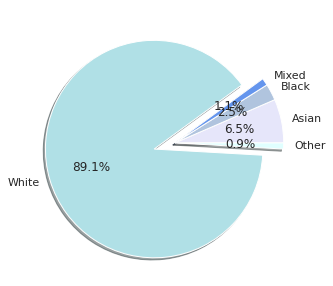

In [ ]:
value2 = [data.loc[['Male'], ['Asian']], data.loc[['Male'], ['Black']],data.loc[['Male'], ['Mixed']],data.loc[['Male'], ['White']],data.loc[['Male'], ['Other']]]
fig, ax = plt.subplots(figsize=(5,5))

ax.pie(value2, labels = ['Asian', 'Black', 'Mixed', 'White', 'Other'], colors = ['lavender','lightsteelblue','cornflowerblue','powderblue','lightcyan'],  startangle= 1800, explode = (0, 0, 0, 0.2, 0),
      autopct='%1.1f%%', shadow = True)
plt.show()

**- 범죄에 제일 취약한 인종**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


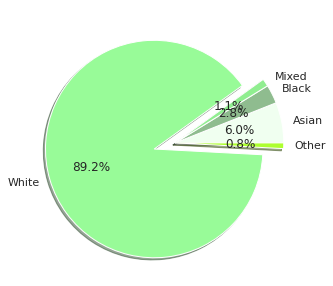

In [ ]:
value3 = [data.loc[['All'], ['Asian']], data.loc[['All'], ['Black']],data.loc[['All'], ['Mixed']],data.loc[['All'], ['White']],data.loc[['All'], ['Other']]]
fig, ax = plt.subplots(figsize=(5,5))

ax.pie(value3, labels = ['Asian', 'Black', 'Mixed', 'White', 'Other'], colors = ['honeydew','darkseagreen','lightgreen','palegreen','greenyellow'], startangle= 1800,
      explode = (0, 0, 0, 0.2, 0), autopct='%1.1f%%', shadow = True)

plt.show()

# Bar Plot/Line plot - overlay
**- 사회 경제적 부분별 범죄 희생자의 인종별 명 수 **

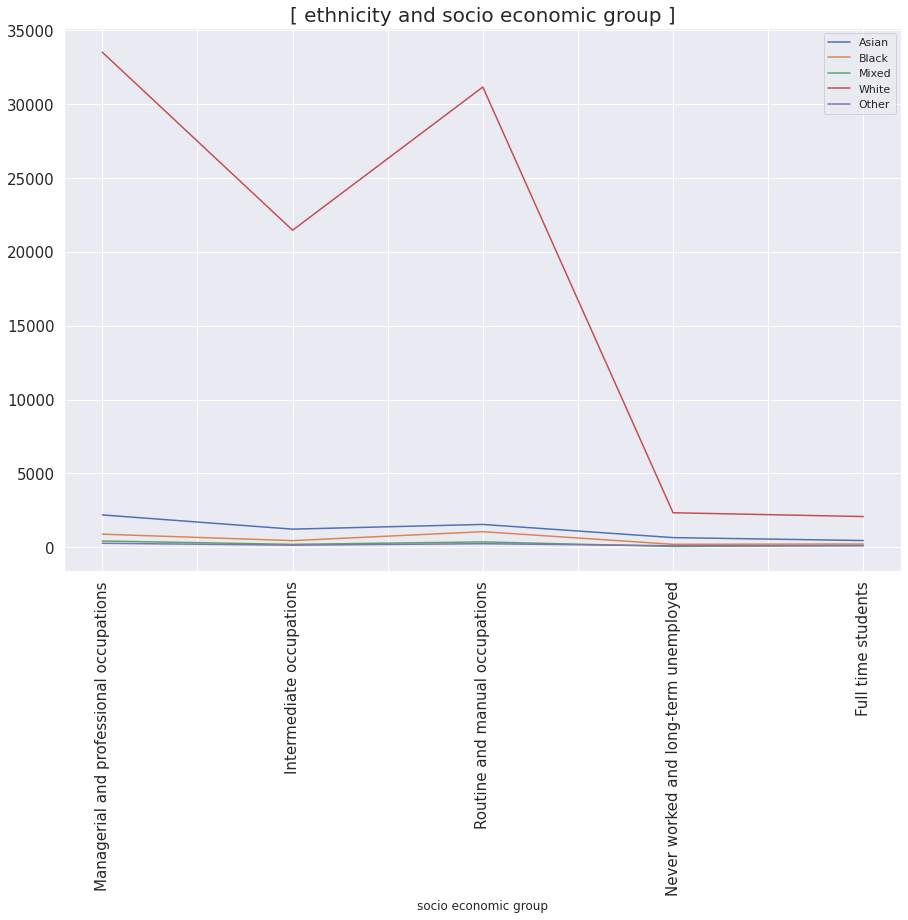

In [ ]:
data2.plot(x="socio economic group", y=["Asian", "Black", "Mixed", "White", "Other"], kind = "line", figsize = (15,10),fontsize = 15)
plt.xticks(rotation=90)
plt.title("[ ethnicity and socio economic group ]", fontsize = 20)
plt.show()

**- 가장 많은 부분을 차지하는 백인을 제외한 나머지 인종의 사회 경제부분별 명수**

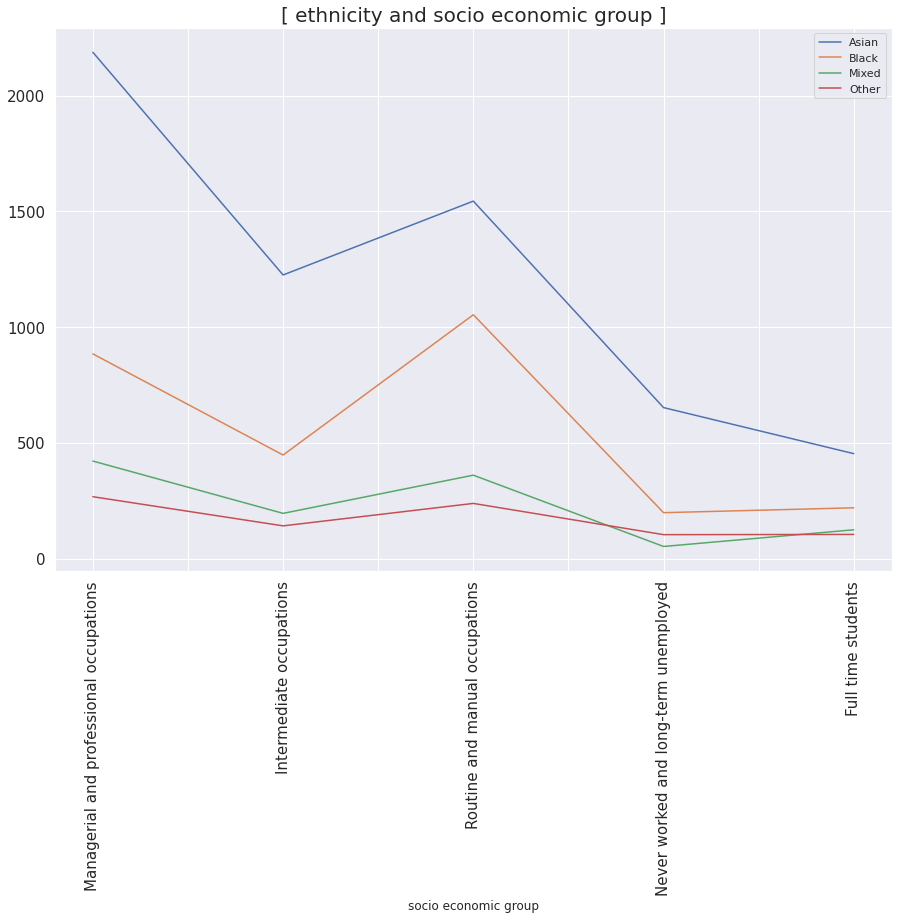

In [ ]:
data2.plot(x="socio economic group", y=["Asian", "Black", "Mixed", "Other"], kind = "line", figsize = (15,10), fontsize = 15)
plt.xticks(rotation=90)
plt.title("[ ethnicity and socio economic group ]", fontsize = 20)
plt.show()







**- 가장 범죄에 취약한 사회 경제적 집단은 Managerial and professional occupations이다.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


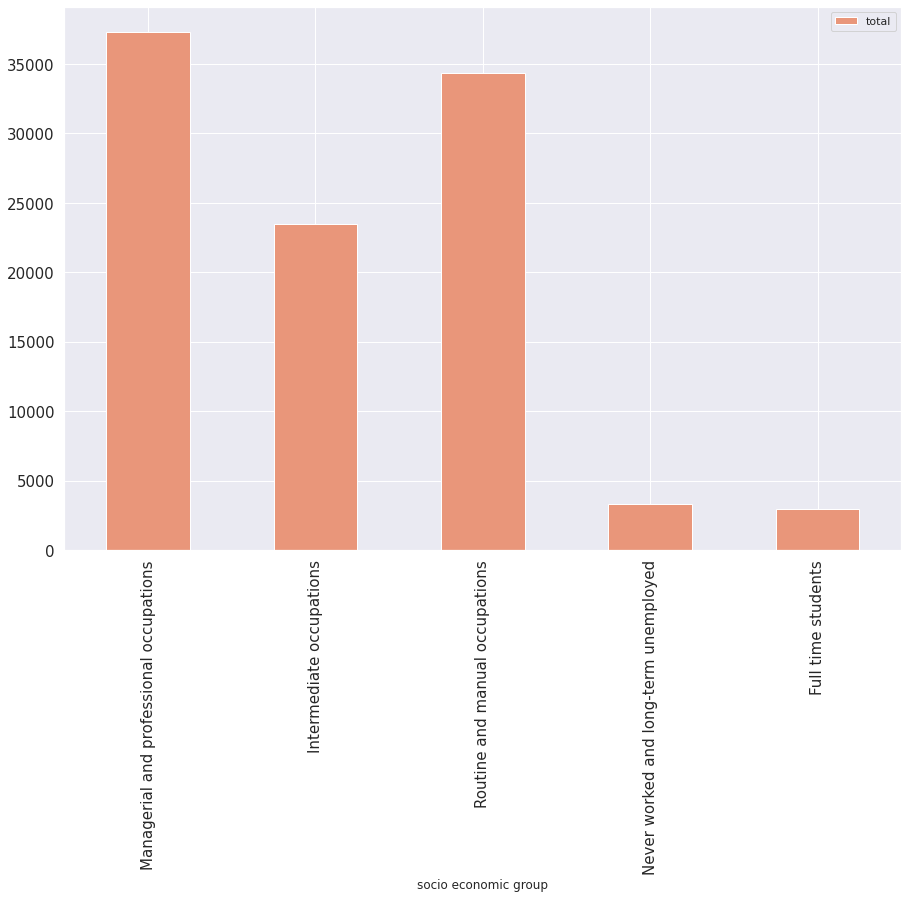

In [ ]:
data2['total'] = data2['Asian'] + data2['Black']+data2['Mixed']+data2['Other']+data2['White']
data2.plot(x="socio economic group", y="total", kind = "bar", figsize = (15,10),fontsize = 15, color='darksalmon')